In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
#pip install plotly 설치
import plotly

In [5]:
plotly.__version__

'5.4.0'

In [ ]:
# 데이터 시각화
# plotly
# 코로나 바이러스 데이터 분석 실습
# plotly와 Dash를 활용한 웹 서버 구축 실습

In [ ]:
# plotly
# 01. plotly 소개
# 02. plotly 지원 모드(Online 모드 VS Offline 모드)
# 03. plotly 중요 모듈(graph_object VS express)

In [ ]:
# 01. plotly 소개
# plotly
# 파이썬 기반 오픈 소스 시각화 라이브러리
# Jupyter notebook과 웹 브라우저에 모두 호환 가능
# plotly.js 기반으로 구현
# 유료 버전(Enterprise) 버전도 존재(https://plotly.com/) 하지만, 오픈소스 버전은 무료로 사용 가능
# Basic Charts
# Statistical Charts
# Artificial Intelligence and Machine Learning
# Maps
# 3D Charts
# 최근 많이 활용되는 라이브러리

In [ ]:
# 02. plotly 지원 모드(Online 모드 VS Offline 모드)
# plotly 지원 모드
# 1) Online
# 인터넷에 연결되어 있음
# plotly의 Chart Studio라고 불리는 별도 서버에서 시각화 작업을 수행하는 것
# Online 모드로 사용하기 위해서는 우선 plotly에 회원 가입하고 인증키(API 키)를 발급 받아야 함
# 프로그램을 실행 시킬 때 사용자명과 api키가 입력되어야 함
# api_key : 식별자, 유일한 값
# plotly 회원가입 -> api_key 요청 -> 컴토 승인 후 전달
# Online 버전 : plotly chart studio라는 별도 외부 서버에서 시각화 수행
# plotly 3.X 버전
# Online, Offline 모드 모두 포함
# plotly 4.X 버전
# Online 버전 미포함
# Online 버전은 chart studio 통해서만 지원
# Offline 모드 사용 권장
# 2) Offline
# 인터넷에 연결되어 있지 않음
# 시각화 작업을 내 컴퓨터로 진행
# plotly 기본 옵션 Offline

In [ ]:
# 03. plotly 중요 모듈(graph_object VS express)
# 1) graph_objects
# plotly에서 제공하는 데이터 시각화를 위한 모듈
# matplotlib의 pyplot 모듈과 같이, Figure을 생성하고 그래프(plot)을 그리는 대부분의 기능을 제공하는 핵심 모듈
# Low-level interface를 제공함
# 기능이 풍부하여 원하는 대로 그래프 수정 및 제어 가능
# But, 문접이 복잡하고 사용하기 어려움
# 2) express
# 사용자 친화적이고 사용하기 쉽도록 구현된 모듈
# High-level interface 제공
# 사용자 입장에서 손쉽게 사용할 수 있는 Interface 제공
# graph_objects와 비교하여 기능이 제한적(e.g. multi-Index 지원 X)
# 약간의 코딩으로도 세련된 그래프를 그릴 수 있음
# 버전 4부터는 express first 정책으로 express 개발에 더 집중하고 있음

In [ ]:
# plotly.express 실습하기

# plotly 기초 실습

### 1. jupyter notebook에서 plotly 사용을 위한 설정

In [6]:
# Jupyter setup
# offline 모드로 jupyter notebook에서 plotly를 사용하기 위한 설정
# Offline 모드 connected를 True로 설정하고 나면 plotly에 해당하는 시각화 그래프가 표현됨
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

### 2. plotly의 graph_objects와 express

In [7]:
# 데이터 생성
df = DataFrame({
  "과일": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "참가자": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "먹은 갯수": [2, 1, 3, 1, 3, 2],
})
df

,과일,참가자,먹은 갯수
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [8]:
# graph_objects 코드 실행
import plotly.graph_objects as go # plotly에서 제공하는 그리기 객체
fig = go.Figure()
for contestant, group in df.groupby("참가자"):
    fig.add_trace(go.Bar(x=group["과일"], y=group["먹은 갯수"], name=contestant,
      hovertemplate="참가자=%s<br>과일=%%{x}<br>먹은 갯수=%%{y}<extra></extra>"% contestant))
fig.update_layout(legend_title_text = "참가자")
fig.update_xaxes(title_text="과일")
fig.update_yaxes(title_text="먹은 갯수")
fig.show()

In [9]:
# express 코드 실행
# 마우스오버(호버링) 시 관련 정보 확인
# 대화형 인터페이스 제공(추가, 삭제 등)
# 파일 다운로드
# Zoom 기능
# 홈 버튼 클릭 시 원래대로 돌아옴
import plotly.express as px
fig = px.bar(df, x="과일", y="먹은 갯수", color="참가자", barmode="group")
fig.show()

### 3. plotly.express 살펴보기
 - https://plotly.com/python/plotly-express/ 


In [ ]:
# 다양한 그래프 지원
# plotly에서 관련 sample 코드와 결과까지 확인할 수 있음

#### 3.1 Bar chart with Plotly Express

In [11]:
# 샘플 코드 from plotly 홈페이지
# px.data.gapminder() : Sample 데이터 제공 함수
# 캐나다의 연도별 인구 정보
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'") # 데이터 가져오기
fig = px.bar(data_canada, x='year', y='pop') # X축은 year, y축은 pop으로 해서 막대 그래프 그리기
fig.show()

In [12]:
# 코드 이해하기
# 01. 데이터 확인하기
data_canada = px.data.gapminder().query("country == 'Canada'") # 데이터 가져오기
data_canada

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124


In [13]:
# 02. 코드 작성하기
# 1) 데이터 : data_canada
# 2) X축 값으로 사용할 컬럼 : year
# 3) Y축 값으로 사용할 컬럼 : pop
fig = px.bar(data_canada, x='year', y='pop') # X축은 year, y축은 pop으로 해서 막대 그래프 그리기
fig.show()

- [실습 #1] 위 실습 코드를 참고하여, 한국과 미국와 GDP를 비교

In [22]:
# 한국과 미국의 GDP 비교
# 01. 데이터 가져오기
# query(조건) : 조건에 맞는 데이터만 필터링
# query를 제거하면 모든 데이터 확인 가능
data = px.data.gapminder() # 데이터 가져오기
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [23]:
# 02. 한국, 미국 데이터 선택하기
# 한국, 미국 표기법을 찾으려면?
# country 컬럼의 값을 확인
# 한국 : 'Korea, Rep.'
# 미국 : 'United States'
data.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [24]:
data2 = data[data.country.isin(['Korea, Rep.', 'United States'])]
data2

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226,KOR,410
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537,KOR,410
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387,KOR,410
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142,KOR,410
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650,KOR,410
845,"Korea, Rep.",Asia,1977,64.766,36436000,4657.221020,KOR,410
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464,KOR,410
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805,KOR,410
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720,KOR,410
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960,KOR,410


In [27]:
# 03. 막대그래프 만들기
# 기존 구문을 참고하여 작성하기!
# 한국과 미국 데이터 구분이 안됨
fig = px.bar(data2, x='year', y='gdpPercap') # X축은 year, y축은 gdpPercap으로 해서 막대 그래프 그리기
fig.show()

In [29]:
# 나라별 막대그래프를 그리기 위한 코드 작성하기
# color = 'country'
# Color는 Country의 값을 기준으로 다른 Color를 적용하라는 의미
fig = px.bar(data2, x='year', y='gdpPercap', color='country') # X축은 year, y축은 gdpPercap으로 해서 막대 그래프 그리기
fig.show()

In [32]:
# 그래프를 따로 그리고 싶다면?
# barmode 활용
# 공식 홈페이지의 API 문서를 참고하면 보다 전문적인 상세한 정보를 알 수 있음
fig = px.bar(data2, x='year', y='gdpPercap', # X축은 year, y축은 gdpPercap으로 해서 막대 그래프 그리기 
             color='country', barmode='group',
             title='GDP - US VS Korea'
            ) 
fig.show()

#### 3.2 Customize bar chart with Plotly Express

In [33]:
# 샘플 코드 from plotly 홈페이지
# hover_data : Hovering(mouseover) 시 나오는 데이터
# 기본정보 이외에 추가 정보를 보이게끔 설정
# labels : 'pop'을 'population of Canada'로 변경
# height : 그래프의 길이(높이)
# width로 그래프 너비도 지정 가능
import plotly.express as px
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
fig = px.bar(data_canada, x='year', y='pop', barmode = 'group',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp', 
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [34]:
# 코드를 지워 어떻게 바뀌는지 확인해보자!
fig = px.bar(data_canada, x='year', y='pop',
             barmode = 'group', color='lifeExp', 
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [35]:
# color로 지정된 컬럼의 값에 따른 차이
# 숫자형 데이터의 경우, 값의 크기에 따라 색상이 점진적으로 표현(gradation)
# 카테고리 데이터의 경우, 각 label별로 다른 색상으로 표현
fig = px.bar(data_canada, x='year', y='pop', barmode = 'group',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

- [실습 #2] 실습 1. 그래프에 hover_data에 lifeExp를 추가하고, x축, y축, 라벨의 이름을 각각 GDP, 년도, 나라로 변경

In [37]:
# 1) hover_data를 활용한 lifeExp 추가하기
# hover_data의 인자값은 컬럼 개수에 상관 없이 리스트로 전달해야 함
# 2) labels를 활용한 xy축, 라벨 이름 변경하기
fig = px.bar(data2, x='year', y='gdpPercap', # X축은 year, y축은 gdpPercap으로 해서 막대 그래프 그리기
             color='country', barmode='group', 
             title='GDP - US VS Korea', 
             hover_data=['lifeExp'], 
             labels={'year':'년도',
                     'gdpPercap':'GDP',
                     'country':'나라'}
            ) 
fig.show()

#### 3.3 faceted subplots 
- 여러 개의 subplot을 그릴 때 사용

In [38]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group",
             facet_row="time", facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]})
fig.show()

In [39]:
# 데이터 확인하기
# tip
df = px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [40]:
# facet_row, facet_col
# facet_row = 'time'
# time이 Lunch일 때와 time이 Dinner일 때 각각 그래프를 그려라
# facet_col = 'day'
# 요일별로 나눠서 각각 그래프를 그려라
# category_orders : day와 time의 순서 맵핑
# category_orders={"day": ["Thur", "Fri", "Sat", "Sun"], "time": ["Lunch", "Dinner"]})
# 그래프를 그릴 때 순서를 지정
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group",
             facet_row="time", facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]})
fig.show()

- [실습 #3] 실습 2. 그래프를 korea와 US 각각의 그래프로 표현하시오.

In [42]:
# 1) facet_row
# facet_row에 country가 들어가고, 막대를 따로따로 넣을 것이기 때문에 color의 country는 삭제해야 한다.
fig = px.bar(data2, x='year', y='gdpPercap', # X축은 year, y축은 gdpPercap으로 해서 막대 그래프 그리기
             barmode='group', 
             title='GDP - US VS Korea', 
             facet_row='country',
             hover_data=['lifeExp'], 
             labels={'year':'년도',
                     'gdpPercap':'GDP',
                     'country':'나라'}
            ) 
fig.show()

In [43]:
# 1) facet_col
# facet_col에 country가 들어가고, 막대를 따로따로 넣을 것이기 때문에 color의 country는 삭제해야 한다.
# facet_col의 경우 방향만 달라짐
fig = px.bar(data2, x='year', y='gdpPercap', # X축은 year, y축은 gdpPercap으로 해서 막대 그래프 그리기
             barmode='group', 
             title='GDP - US VS Korea', 
             facet_col='country',
             hover_data=['lifeExp'], 
             labels={'year':'년도',
                     'gdpPercap':'GDP',
                     'country':'나라'}
            ) 
fig.show()

In [ ]:
# plotly에서 제공하는 코드를 참조하여 코드를 이해하고, 각각의 인자가 어떻게 동작하는지 확인해보기

In [ ]:
# plotly with Pandas
# Cufflinks와 Backend 소개
# Backend 사용 방법
# 01. Pandas와 plotly 함께 사용하기 [1] Cufflinks
# 02. Pandas와 plotly 함께 사용하기 [2] Backend

In [ ]:
# 01. Pandas와 plotly 함께 사용하기 [1] Cufflinks
# Pandas의 plot() 함수
# pandas.DataFrame.plot()
# 1) kind = line
# matplotlib.plot()
# 2) kind = bar
# matplotlib.bar()
# 3) kind = hist
# matplotlib.hist()
# Matplotlib 라이브러리를 기반으로 구현
# 적절한 Matplotlib의 함수를 호출하여 데이터 시각화를 수행함
# 다른 외부 라이브러리 함수를 호출하는 중간 단계의 함수나 객체를 Wrapper 클래스 혹은 Wrapper 함수라고 함
# Cufflinks
# pandas.DataFrame.iplot()
# 1) kind = line
# plotly.line()
# 2) kind = bar
# plotly.bar()
# 3) kind = hist
# plotly.histogram()
# 별도 설치 필요
# Cufflinks 설치 후, iplot() 함수를 사용하면 적절한 plotly 함수를 수행
# 즉, cufflinks는 pandas와 plotly를 연결해 주는 역할을 수행

In [ ]:
# Pandas : 데이터 분석 라이브러리
# plotly : 데이터 시각화 라이브러리
# Cufflinks : Pandas와 plotly를 함께 사용하기 위한 라이브러리
# Pandas의 plotting.backend는 Cufflinks 라이브러리를 대신함

In [44]:
# plot() 함수 실행
# Matplotlib에 있는 함수 호출
pd.options.plotting.backend

'matplotlib'

In [ ]:
# matplotlib 스타일로 막대그래프로 표현해보기

<AxesSubplot:>

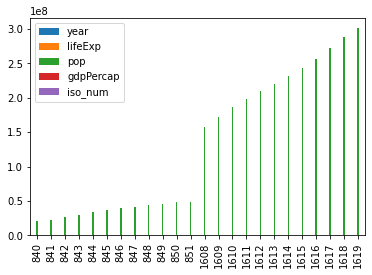

In [49]:
# data2.plot()
# Matplotlib에 있는 plot() 함수 호출
# data2.plot(kind = 'bar')
# X축 : row index
# Label : column index
data2.plot(kind = 'bar')

array([<AxesSubplot:title={'center':'Korea, Rep.'}, xlabel='year'>,
       <AxesSubplot:title={'center':'United States'}, xlabel='year'>],
      dtype=object)

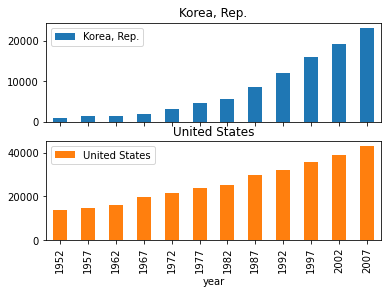

In [55]:
# 한국과 미국 GDP 연도별 추이
# X축 : year
# Label : country(나라 이름)
# set_index() : column index를 row index로 바꿈
# unstack() : row index를 column index로 바꿈
# subplots = True : 나라별로 그래프(Axes) 생성
data2.set_index(['year', 'country'])['gdpPercap'].unstack().plot(kind = 'bar', subplots = True)

In [120]:
# pandas의 시각화 backend를 plotly로 변경

In [56]:
# backend를 plotly로 설정
pd.options.plotting.backend = 'plotly'

In [57]:
pd.options.plotting.backend

'plotly'

In [59]:
# 어떤 backnd를 사용하느냐에 따라, 동일한 DataFrame의 plot() 함수라 하더라도, 인자가 달라진다. 
# backend가 matplotlib일 때의 코드는 정상적으로 동작하지 않는다.  
# Error 발생
# data2.set_index(['year', 'country'])['gdpPercap'].unstack().plot(kind = 'bar', subplots = True)

In [60]:
fig = data2.plot(kind = 'bar', x='year', y='gdpPercap', # X축은 year, y축은 gdpPercap으로 해서 막대 그래프 그리기
             barmode='group', 
             title='GDP - US VS Korea', 
             facet_col='country',
             hover_data=['lifeExp'], 
             labels={'year':'년도',
                     'gdpPercap':'GDP',
                     'country':'나라'}
            ) 
fig.show()